In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from numpy.random import random
from numpy import arange
from math import pi

In [2]:
from windrose import WindroseAxes

#Create wind speed and direction variables

In [3]:
N = 500
ws = random(N)*6
wd = random(N)*360

In [4]:
df = pd.DataFrame({"speed": ws, "direction": wd})
df

,direction,speed
0,141.897210,0.341914
1,218.263732,4.203831
2,8.993158,4.110504
3,198.818551,4.025551
4,173.734921,4.594261
5,207.936808,1.152846
6,220.192499,4.321303
7,168.192606,1.046868
8,279.280602,0.268592
9,122.016173,2.801993


#A basic scatter plot with transparency (alpha)

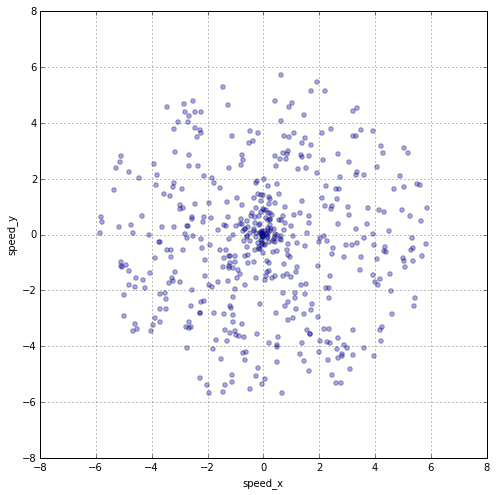

In [14]:
df['speed_x'] = df['speed'] * np.sin(df['direction'] * pi / 180.0)
df['speed_y'] = df['speed'] * np.cos(df['direction'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
_ = df.plot(kind='scatter', x='speed_x', y='speed_y', alpha=0.35, ax=ax)

In [6]:
def new_axes():
    fig = plt.figure(figsize=(8, 8), dpi=80, facecolor='w', edgecolor='w')
    rect = [0.1, 0.1, 0.8, 0.8]
    ax = WindroseAxes(fig, rect, axisbg='w')
    fig.add_axes(ax)
    return ax

def set_legend(ax):
    l = ax.legend(borderaxespad=-0.10)
    plt.setp(l.get_texts(), fontsize=8)

#windrose like a stacked histogram with normed (displayed in percent) results

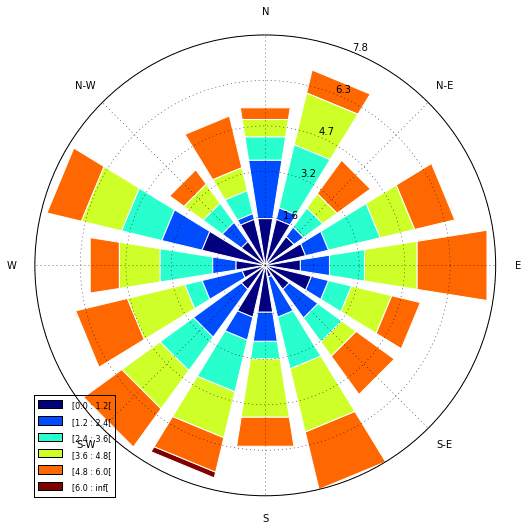

In [7]:
ax = new_axes()
ax.bar(df.direction, df.speed, normed=True, opening=0.8, edgecolor='white')
set_legend(ax)

#Another stacked histogram representation, not normed, with bins limits

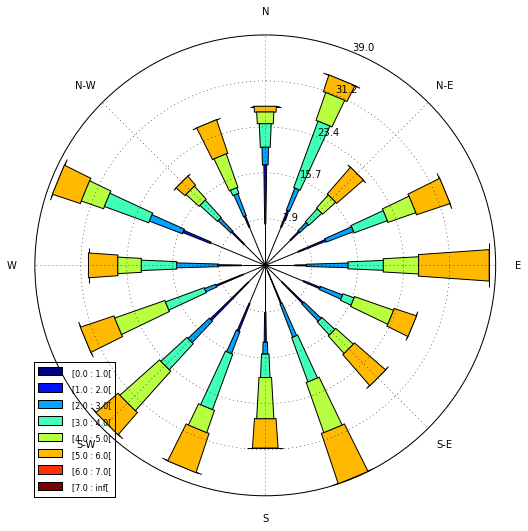

In [8]:
ax = new_axes()
ax.box(df.direction, df.speed, bins=arange(0,8,1))
set_legend(ax)

#A windrose in filled representation, with a controled colormap

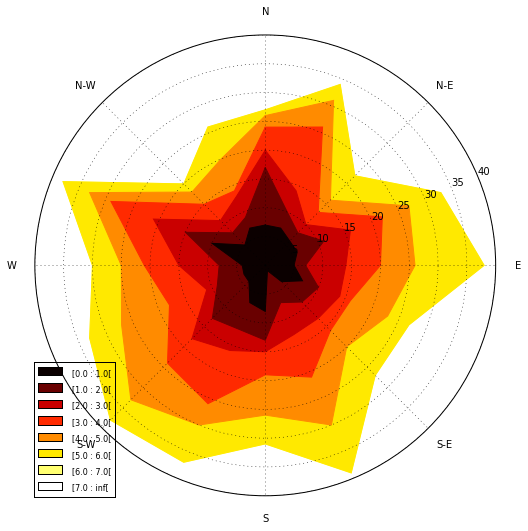

In [9]:
ax = new_axes()
ax.contourf(df.direction, df.speed, bins=arange(0,8,1), cmap=cm.hot)
set_legend(ax)

#Same as above, but with contours over each filled region...

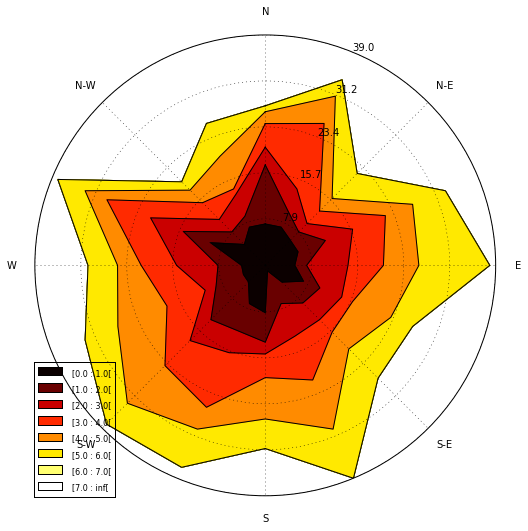

In [10]:
ax = new_axes()
ax.contourf(df.direction, df.speed, bins=arange(0,8,1), cmap=cm.hot)
ax.contour(df.direction, df.speed, bins=arange(0,8,1), colors='black')
set_legend(ax)

#...or without filled regions

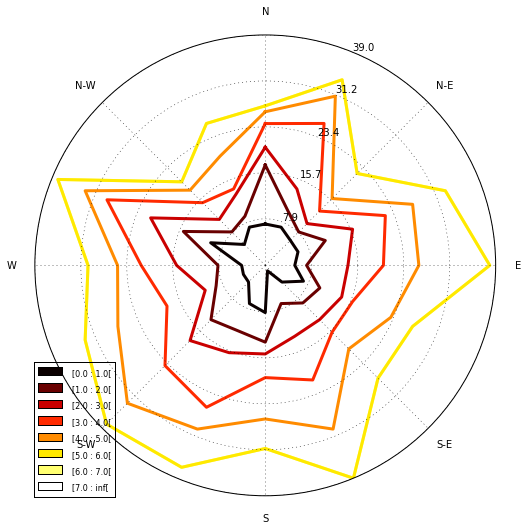

In [11]:
ax = new_axes()
ax.contour(df.direction, df.speed, bins=arange(0,8,1), cmap=cm.hot, lw=3)
set_legend(ax)